In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("C:/Users/85059/Desktop/DATA7703 Machine Learning/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("C:/Users/85059/Desktop/DATA7703 Machine Learning/house-prices-advanced-regression-techniques/test.csv")
pd.set_option("display.width", 600)

# 数据尺寸
print('The train data shape: {}'.format(df_train.shape))

# 数据类型
print(df_train.dtypes)
df_train.describe()

The train data shape: (1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


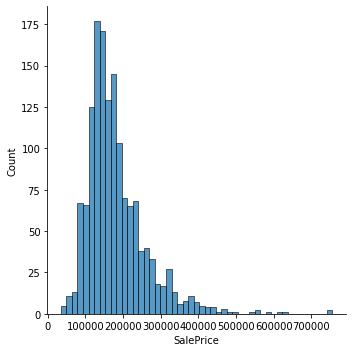

In [28]:
# 房价数据直方图
sns.displot(df_train["SalePrice"])

(-0.5, 1.5, 0.0, 800000.0)

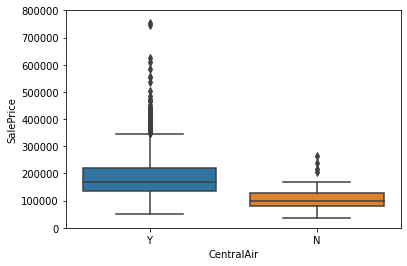

In [20]:
# 单变量分析
var = 'CentralAir'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

In [97]:
# 分辨数据类型
def col_types(df):
    num_cols = df.loc[:, df.dtypes != "object"].columns.tolist()
    cat_cols = df.loc[:, df.dtypes == "object"].columns.tolist()
    ord_cols = []
    for col in num_cols:
        if df[col].value_counts().size < 20:
            ord_cols.append(col)

    num_cols = [x for x in num_cols if x not in ord_cols + ["Id", "SalePrice"]]
    
    return num_cols, cat_cols, ord_cols

In [88]:
# --------------------------数据清洗-------------------------
df_train.drop("Id", inplace=True, axis=1)
# df_test.drop("Id", inplace=True, axis=1)

# 统计null数据的frequency
def count_missing(df):
    miss = pd.DataFrame({"missing_counts": df.isnull().sum(),
                         "missing_value_ratio": (df.isnull().sum() / df.shape[0]).round(4)})
    return miss[miss.missing_counts > 0].sort_values("missing_counts", ascending=False)

count_missing(df_train)

,missing_counts,missing_value_ratio
PoolQC,1453,0.9952
MiscFeature,1406,0.9630
Alley,1369,0.9377
Fence,1179,0.8075
FireplaceQu,690,0.4726
LotFrontage,259,0.1774
GarageType,81,0.0555
GarageYrBlt,81,0.0555
GarageFinish,81,0.0555
GarageQual,81,0.0555


In [89]:
# 整合数据
y_train = df_train.SalePrice.values
print(y_train)
df_train.drop("SalePrice", inplace=True, axis=1)

# 清洗掉大量缺失的数据
df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

count_missing(df_train)

[208500 181500 223500 ... 266500 142125 147500]


,missing_counts,missing_value_ratio
FireplaceQu,690,0.4726
LotFrontage,259,0.1774
GarageType,81,0.0555
GarageYrBlt,81,0.0555
GarageFinish,81,0.0555
GarageQual,81,0.0555
GarageCond,81,0.0555
BsmtExposure,38,0.0260
BsmtFinType2,38,0.0260
BsmtQual,37,0.0253


In [92]:
# 从这里开始处理其他数据
# print(df_train[df_train.Fireplaces == 0].shape)
# print(df_train[df_train.FireplaceQu.isnull()].shape)
# df_train[(df_train.Fireplaces == 0) & (df_train.FireplaceQu.isnull())]

df_clean = df_train.copy()
miss_col = df_clean.columns[df_train.isnull().any()].tolist()
basement_na_list = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
fireplace_na_liat = ['FireplaceQu']
garage_na_list = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
masonry_na_list = ["MasVnrType"]

for missing in miss_col:
    if missing in basement_na_list:
        df_clean.loc[:,basement_na_list] = df_clean.loc[:,basement_na_list].replace(np.nan,'No basement')
    elif missing in fireplace_na_liat:
        df_clean.loc[:,fireplace_na_liat] = df_clean.loc[:,fireplace_na_liat].replace(np.nan,'No fireplace')
    elif missing in garage_na_list:
        df_clean.loc[:,garage_na_list] = df_clean.loc[:,garage_na_list].replace(np.nan,'No garage')
    elif missing in masonry_na_list:
        df_clean.loc[:,masonry_na_list] = df_clean.loc[:,masonry_na_list].replace(np.nan,'No mansonry')

df_clean.loc[(df_clean.MasVnrArea.isnull()) & (df_clean.MasVnrType == "No mansonry"), "MasVnrArea"] = 0
df_clean.loc[(df_clean.GarageYrBlt.isnull()), "GarageYrBlt"] = 0



# 发现大部分车库建造时间和房子建造时间是吻合的，所以我们impute缺失值为房子建造时间
# df_train[df_train.GarageYrBlt == df_train.YearBuilt].shape[0]
# df_clean.loc[(df_clean.GarageYrBlt.isnull()), "GarageYrBlt"] = df_clean.loc[(df_clean.GarageYrBlt.isnull())].YearBuilt

count_missing(df_clean)

,missing_counts,missing_value_ratio
LotFrontage,259,0.1774
Electrical,1,0.0007


In [94]:
print(df_clean.Electrical.value_counts())

df_clean[df_clean.Electrical.isnull()]

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1379,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,5,2008,WD,Normal


In [96]:
print(df_clean[(df_clean.YearBuilt > 2005)].Electrical.value_counts())
df_clean.Electrical.fillna("SBrkr", inplace=True)

count_missing(df_clean)

SBrkr    158
Name: Electrical, dtype: int64


,missing_counts,missing_value_ratio
LotFrontage,259,0.1774


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0, len(df_clean.columns)-1): #label
    if df_clean.dtypes[i] == 'O': 
        df_clean.iloc[:,i] = le.fit_transform(df_clean.iloc[:,i])

In [109]:
miss_col_clean = df_clean.columns[df_clean.isnull().any()].tolist()
dataframe_x = df_clean.copy()

for feature in miss_col_clean:
    dataframe_x[feature + '_imp'] = dataframe_x[feature]


from sklearn.linear_model import LinearRegression

deter_data = pd.DataFrame(columns = ["Det" + name for name in miss_col_clean])

# after random imputation, predict data in regression 

for feature in miss_col_clean:
        
    deter_data["Det" + feature] = dataframe_x[feature + "_imp"]
    parameters = list(set(dataframe_x.columns) - set(miss_col_clean) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    model.fit(X = dataframe_x[parameters], y = dataframe_x[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[dataframe_x[feature].isnull(), "Det" + feature] = model.predict(dataframe_x[parameters])[dataframe_x[feature].isnull()]
         
dataframe_x

['LotFrontage']


ValueError: could not convert string to float: 'Normal'

In [101]:
# 开始encoding
num_cols, cat_cols, ord_cols = col_types(df_clean)
target_encoding = []

for col in cat_cols:
    possible_cat = df_clean[col].value_counts().size
    print(col, possible_cat)
    if possible_cat > 7:
        target_encoding.append(col)

print(target_encoding)

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
SaleType 9
SaleCondition 6
['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'SaleType']


In [102]:
for col in target_encoding:
    feature_name = col + "Rank"
    df_clean.loc[:, feature_name] = df_clean[col].map(df_clean.groupby(col).SalePrice.median())
    df_clean.loc[:, feature_name] = df_clean.loc[:, feature_name].rank(method = "dense")

AttributeError: 'DataFrameGroupBy' object has no attribute 'SalePrice'

In [ ]:
# 把房子的地下室相关的简单处理成None
df_train[["BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtCond", "BsmtQual"]].fillna(0, inplace=True)

# 因为FirplaceQu没有变化，又因为the NAs indicates NA=No Fireplace,所以写成None
df_train["FireplaceQu"].fillna("None", inplace=True)

# 车库相关的也处理成None
df_train[["GarageCond", "GarageType", "GarageFinish", "GarageQual"]].fillna("None", inplace=True)

# 把GarageYrBlt填上0. 假设车库不是available 
df_train["GarageYrBlt"].fillna(0, inplace=True)

# MasVnrArea填0
df_train["MasVnrArea"].fillna(0, inplace=True)
df_train["MasVnrType"].fillna("None", inplace=True)

# Electrical填成(众数)
most_common = df_train["Electrical"].value_counts().index[0]
df_train ["Electrical"].fillna(most_common, inplace=True)

# LotFrontage: 与房产相连的街道尺寸可以根据建筑物类型而定，所以BldgType处理成均值
df_train["LotFrontage"] = df_train.groupby("BldgType")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

df_clean = df_train
miss_col_clean = df_clean.columns[df_clean.isnull().any()].tolist()
print(miss_col_clean)
df_clean.loc[:, miss_col_clean].isnull().sum()

<AxesSubplot:>

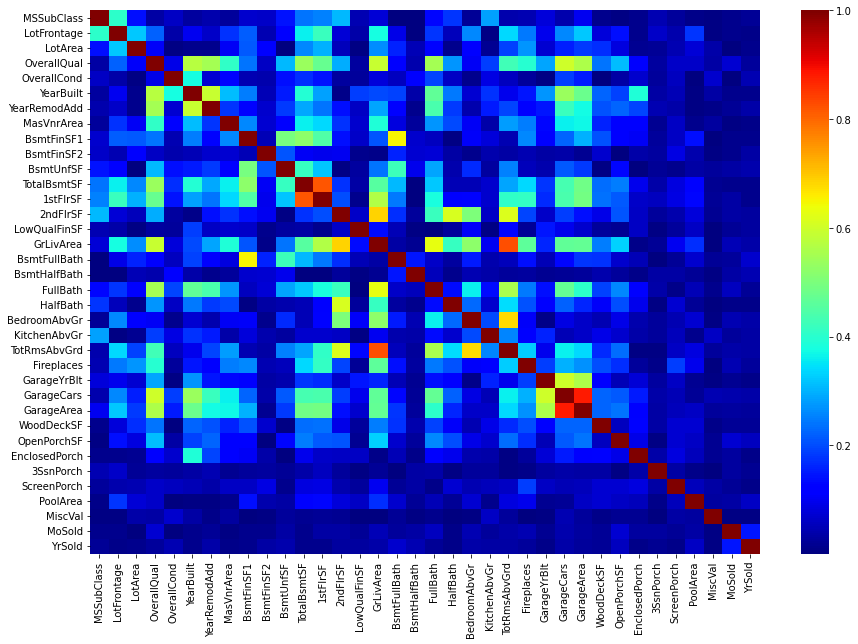

In [23]:
# -------------------特征工程----------------------
# 用协方差矩阵观察训练集数据的相关性
corr_matrix = df_train.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="jet")

In [26]:
# 对数据进行归一化均值处理，找出相关度大于delta的数据，最好不好这样直接删
# 看看lasso或者PCA
delta = 0.8
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] >= delta)]
print(to_drop)

df_train.drop(to_drop, axis=1, inplace=True)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


In [ ]:
# 异常值处理，移除离群点
sns.regplot(x=df_train['GrLivArea'], y=y_train)
drop_points = df_train.sort_values(by='GrLivArea', ascending=False)[:2]['GrLivArea']
drop_points_list = drop_points.index.tolist()
df_train.drop(drop_points_list, inplace=True)

# 删除离群点后，更新训练数据的indexes
y_train = np.delete(y_train, drop_points_list)
df_train_last_index = df_train.shape[0]-len(drop_points_list)

In [ ]:
# Polynomial Regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train[:, :] = sc.fit_transform(df_train[:, :])

print(df_train)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# degree不知道改成多少
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(df_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# y_pred = lin_reg_2.predict(poly_reg.transform(X_test))

In [ ]:
# polynomial的可视化
START_POINT = 100
END_POINT = 150

x = np.arange(START_POINT, END_POINT)
plt.plot(x, y_pred[START_POINT:END_POINT],color = 'red')
plt.scatter(x, y_test[START_POINT:END_POINT],color = 'blue')

plt.show()